# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | roussillon
Processing Record 3 of Set 1 | aykhal
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | happy valley-goose bay
Processing Record 8 of Set 1 | kuanda
Processing Record 9 of Set 1 | el calafate
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | pontianak
Processing Record 12 of Set 1 | nichinan
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 18 of Set 1 | nabire
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | vila franca do campo
Processing Record 21 of Set 1 | gowurdak
Processing Recor

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,70.29,77,12,6.58,PN,1689302261
1,roussillon,45.3730,4.8073,61.05,65,57,3.65,FR,1689302261
2,aykhal,66.0000,111.5000,47.97,39,54,14.97,RU,1689302261
3,papatowai,-46.5619,169.4708,50.16,79,81,16.49,NZ,1689302262
4,yellowknife,62.4560,-114.3525,73.92,33,75,13.80,CA,1689302111


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,70.29,77,12,6.58,PN,1689302261
1,roussillon,45.3730,4.8073,61.05,65,57,3.65,FR,1689302261
2,aykhal,66.0000,111.5000,47.97,39,54,14.97,RU,1689302261
3,papatowai,-46.5619,169.4708,50.16,79,81,16.49,NZ,1689302262
4,yellowknife,62.4560,-114.3525,73.92,33,75,13.80,CA,1689302111


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

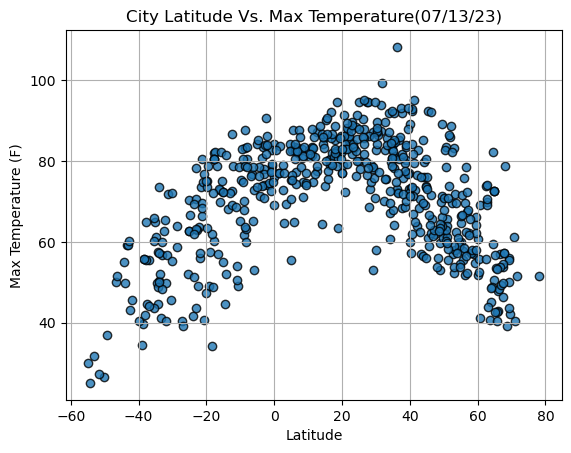

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

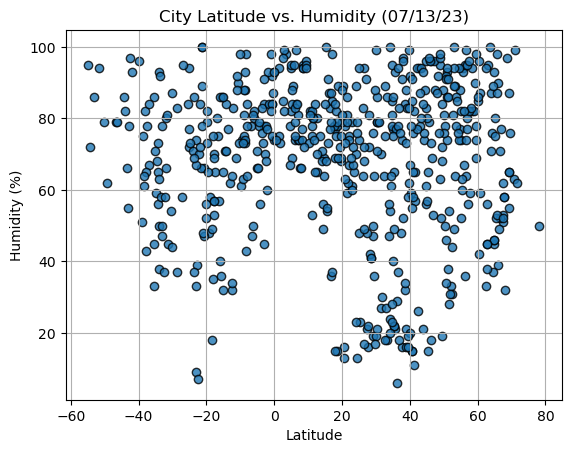

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

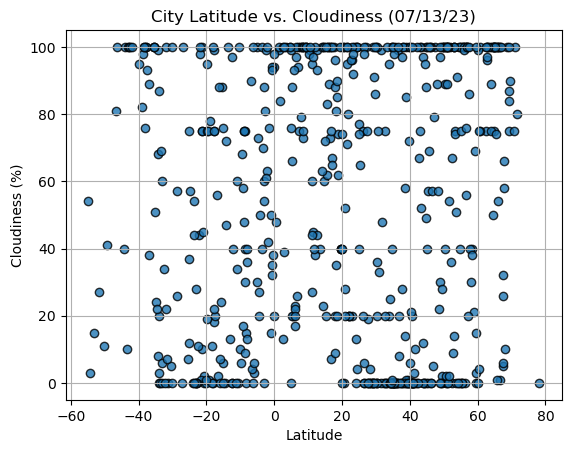

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

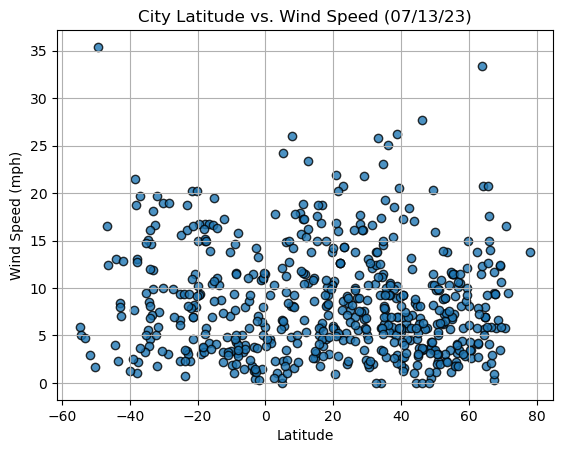

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, output_path):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

    # Create regression line
    regression_line = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)

    # Plot the regression line
    plt.plot(x_values, regression_line, color="red")

    # Set the title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Add the regression equation to the plot
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(equation, (min(x_values), max(y_values)), fontsize=12, color="red")

    # Display the correlation coefficient on the plot
    correlation = f"Correlation: {rvalue:.2f}"
    plt.annotate(correlation, (min(x_values), max(y_values) - 5), fontsize=12, color="red")

    # Save the figure
    plt.savefig(output_path)

    # Show the plot
    plt.show()

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,roussillon,45.3730,4.8073,61.05,65,57,3.65,FR,1689302261
2,aykhal,66.0000,111.5000,47.97,39,54,14.97,RU,1689302261
4,yellowknife,62.4560,-114.3525,73.92,33,75,13.80,CA,1689302111
6,happy valley-goose bay,53.3168,-60.3315,71.91,64,75,2.30,CA,1689302262
7,kuanda,56.3161,116.0806,69.73,36,0,1.88,RU,1689302262


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,70.29,77,12,6.58,PN,1689302261
3,papatowai,-46.5619,169.4708,50.16,79,81,16.49,NZ,1689302262
5,ushuaia,-54.8000,-68.3000,29.95,95,54,5.91,AR,1689302046
8,el calafate,-50.3408,-72.2768,26.47,79,11,1.72,AR,1689302262
9,waitangi,-43.9535,-176.5597,49.82,82,100,13.00,NZ,1689302262


###  Temperature vs. Latitude Linear Regression Plot

In [34]:
# Linear regression on Northern Hemisphere


NameError: name 'plot_linear_regression' is not defined

The r-value is: 0.4121057168607245


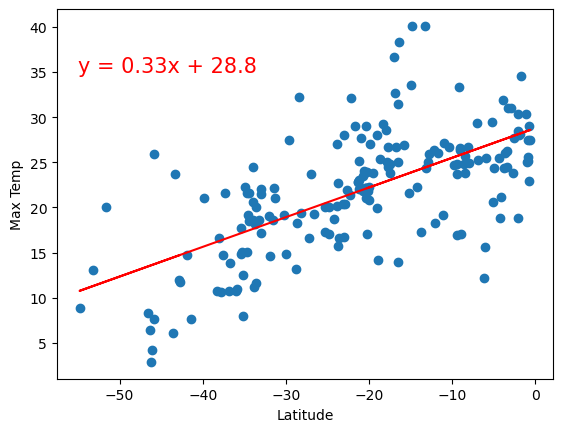

In [16]:
# Linear regression on Southern Hemisphere


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


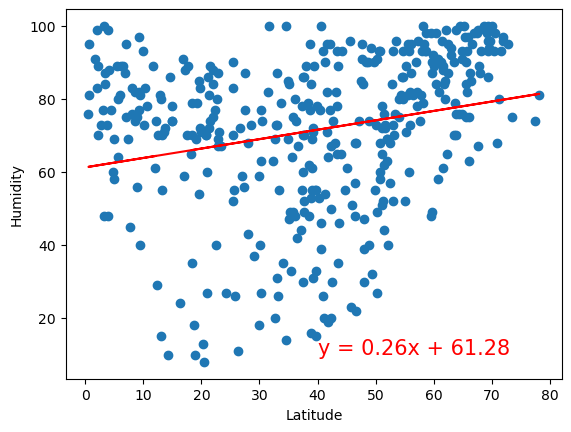

In [17]:
# Northern Hemisphere


The r-value is: 0.0002808747046324607


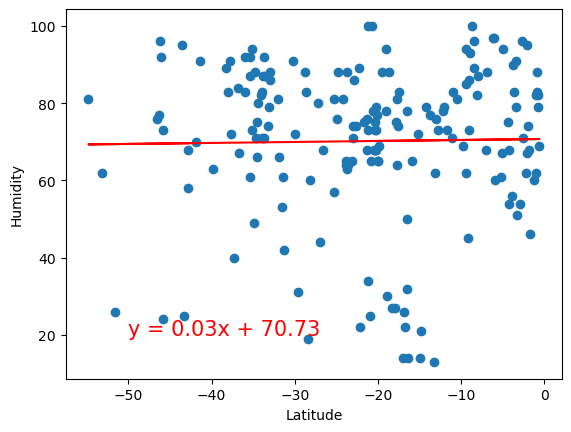

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


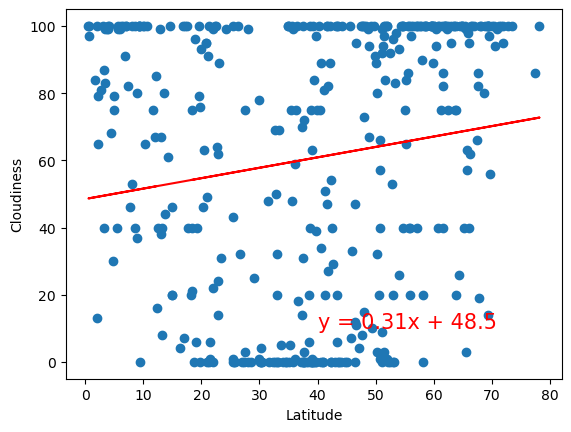

In [19]:
# Northern Hemisphere


The r-value is: 0.02056735429994368


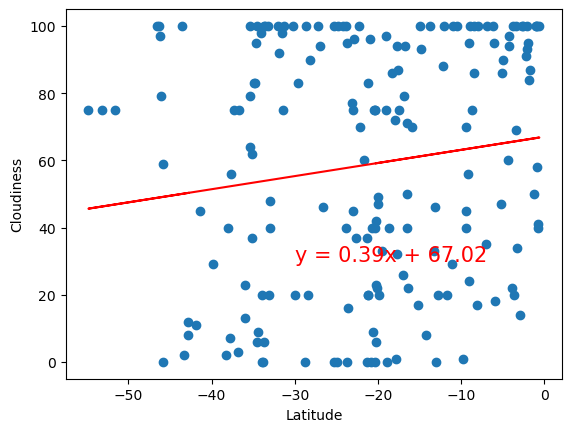

In [20]:
# Southern Hemisphere


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


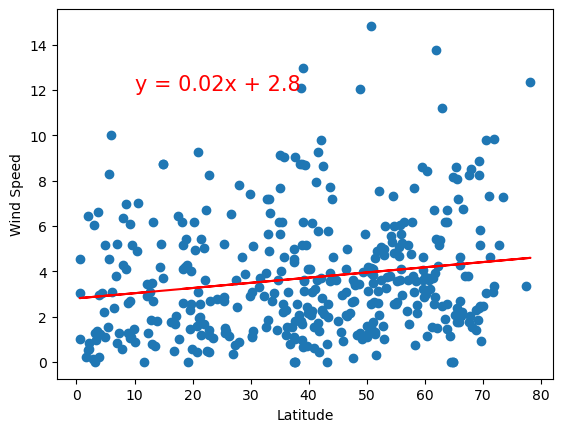

In [21]:
# Northern Hemisphere


The r-value is: 0.062239040700515696


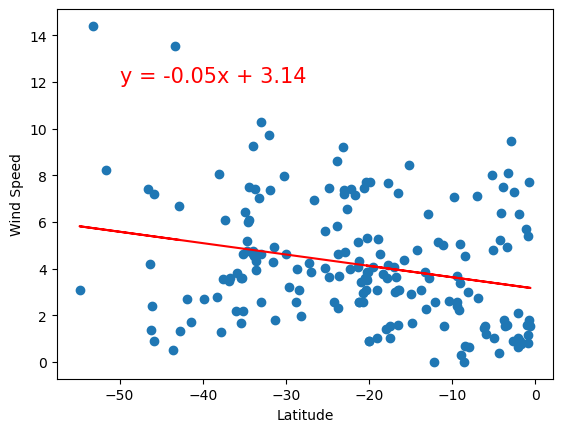

In [22]:
# Southern Hemisphere


**Discussion about the linear relationship:** YOUR RESPONSE HERE